In [1]:
import pandas as pd

# Load the CSV files
totals_df = pd.read_csv('Totals.csv')
advanced_stats_df = pd.read_csv('Advanced.csv')

# Perform the merge using "player name" and "Team" in Totals, and "player name" and "Tm" in Advanced
merged_df = pd.merge(totals_df, advanced_stats_df, left_on=['Player', 'Team'], right_on=['Player', 'Tm'], how='inner')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('Merged_stats.csv', index=False)

print("Merged CSV file saved as 'Merged_stats.csv'")


Merged CSV file saved as 'Merged_stats.csv'


In [2]:
import pandas as pd

# List of CSV files to combine
csv_files = [
    'Merged_stats_11_12.csv', 'Merged_stats_12_13.csv', 'Merged_stats_13_14.csv',
    'Merged_stats_14_15.csv', 'Merged_stats_15_16.csv', 'Merged_stats_16_17.csv',
    'Merged_stats_17_18.csv','Merged_stats_18_19.csv','Merged_stats_19_20.csv','Merged_stats_20_21.csv','Merged_stats_22_23.csv'
]

# Concatenate all the CSV files
combined_df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('Combined_Merged_stats.csv', index=False)

print("All CSV files combined and saved as 'Combined_Merged_stats.csv'")


All CSV files combined and saved as 'Combined_Merged_stats.csv'



Top 12 most important features for clustering:
DRB: 0.0397
TRB: 0.0396
TOV: 0.0377
PER: 0.0376
AST: 0.0374
2P: 0.0370
poss: 0.0368
STL: 0.0366
2PA: 0.0364
3PA: 0.0364
PF: 0.0363
3P: 0.0363


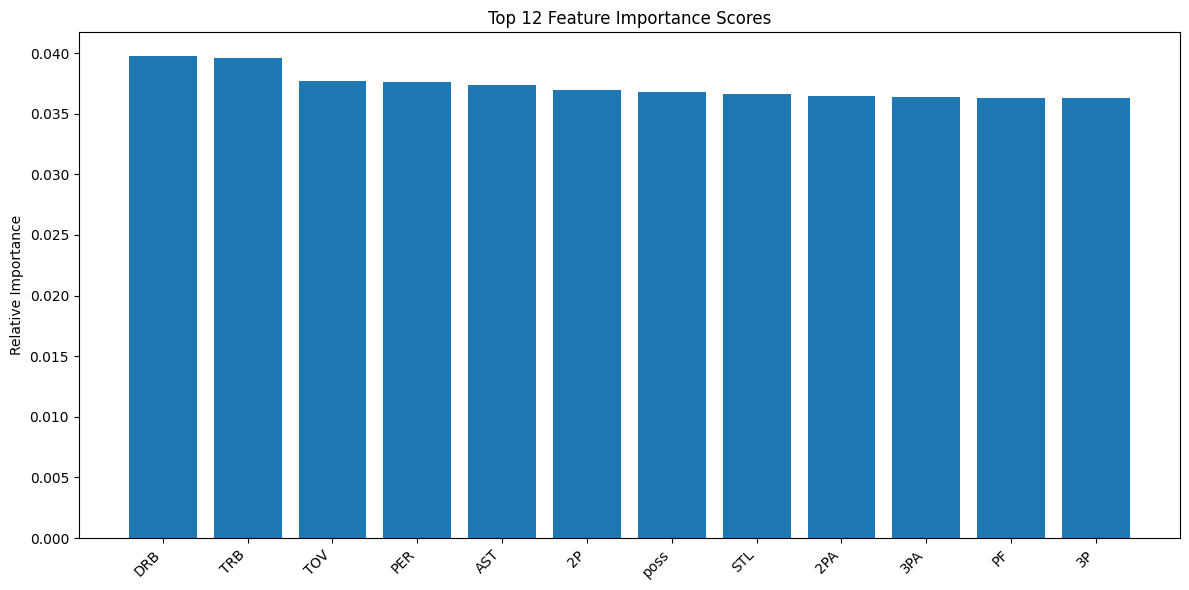

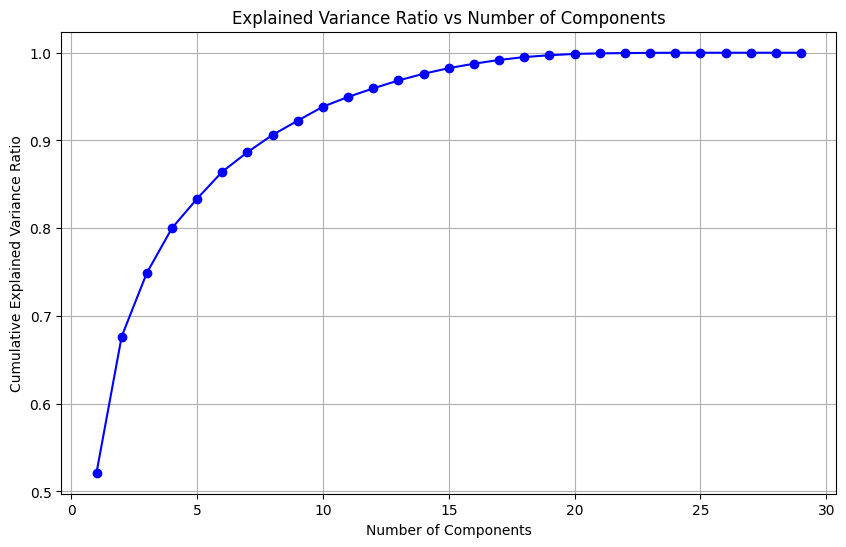


Number of components needed to explain 95% of variance: 12

Explained variance ratio for first few components:
Component 1: 0.5213 (0.5213 cumulative)
Component 2: 0.1552 (0.6766 cumulative)
Component 3: 0.0725 (0.7491 cumulative)
Component 4: 0.0511 (0.8002 cumulative)
Component 5: 0.0335 (0.8337 cumulative)


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load and prepare data
data = pd.read_csv('forPCA.csv')  # Replace with your actual data loading
data = data.drop(data.columns[0], axis=1)  # Drop the unnamed column
data = data.dropna()

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Calculate feature importance using a different method
# We'll use the absolute values of the component loadings weighted by explained variance
feature_importance = np.sum(np.abs(pca.components_.T) * explained_variance_ratio, axis=1)
# Normalize to get relative importance
feature_importance = feature_importance / np.sum(feature_importance)

# Get the top 12 most important features
feature_importance_dict = dict(zip(data.columns, feature_importance))
top_12_features = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:12])

print("\nTop 12 most important features for clustering:")
for feature, importance in top_12_features.items():
    print(f"{feature}: {importance:.4f}")

# Create a bar plot of feature importance
plt.figure(figsize=(12, 6))
features = list(top_12_features.keys())
importances = list(top_12_features.values())
plt.bar(features, importances)
plt.xticks(rotation=45, ha='right')
plt.title('Top 12 Feature Importance Scores')
plt.ylabel('Relative Importance')
plt.tight_layout()
plt.show()

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.show()

# Print the number of components needed to explain 95% of variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"\nNumber of components needed to explain 95% of variance: {n_components_95}")

# Print the explained variance ratio for first few components
print("\nExplained variance ratio for first few components:")
for i, var in enumerate(explained_variance_ratio[:5], 1):
    print(f"Component {i}: {var:.4f} ({cumulative_variance_ratio[i-1]:.4f} cumulative)")

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 1.8804519496477607


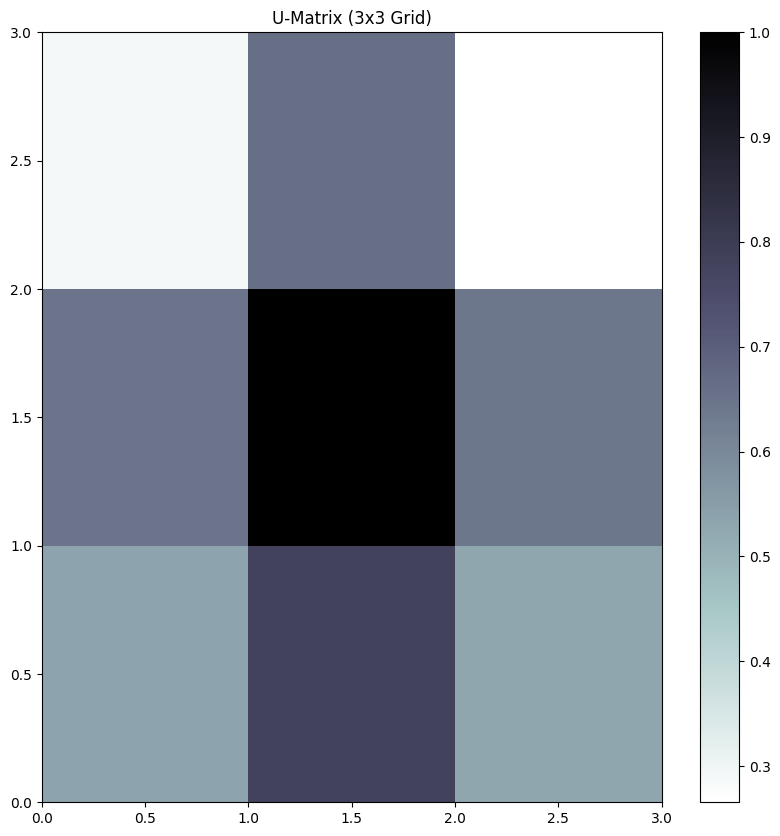


Number of players in each cluster:
3    386
6    370
4    283
7    274
0    273
8    272
2    197
1    183
5    138
Name: Cluster, dtype: int64


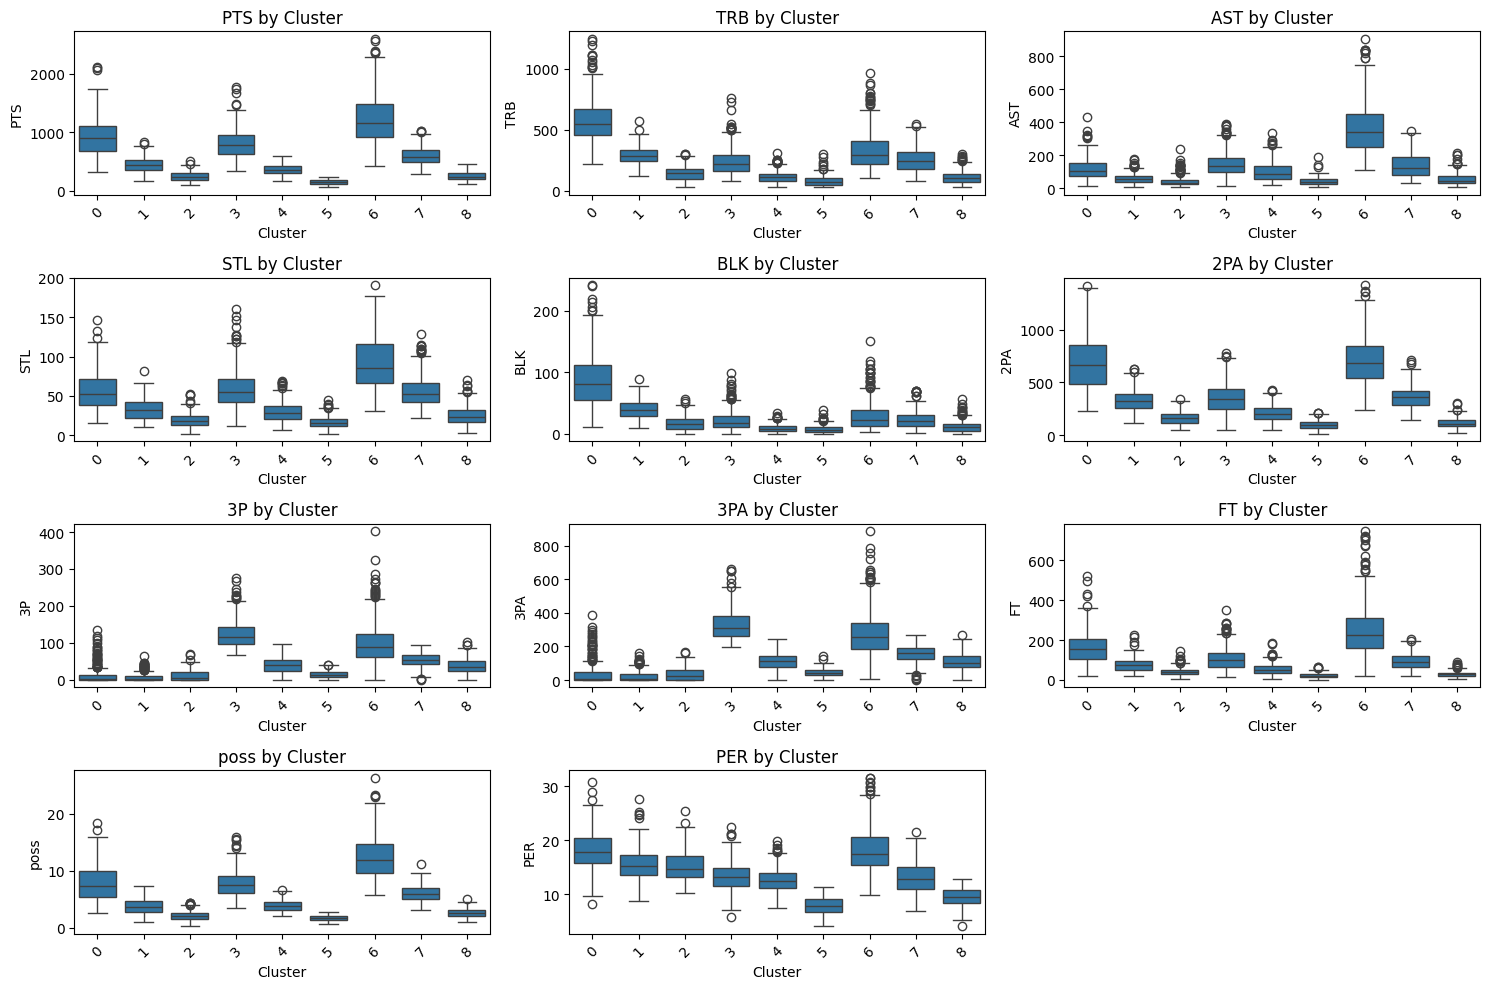

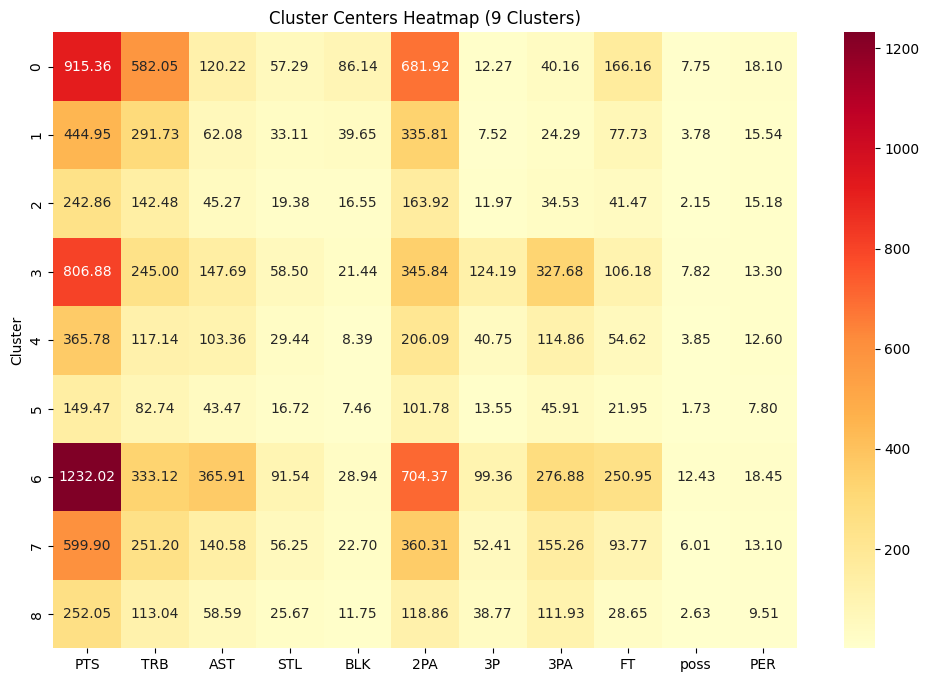


Cluster Characteristics:

Cluster 0:
PTS: 915.36
TRB: 582.05
AST: 120.22
STL: 57.29
BLK: 86.14
2PA: 681.92
3P: 12.27
3PA: 40.16
FT: 166.16
poss: 7.75
PER: 18.10
Number of players: 273

Cluster 1:
PTS: 444.95
TRB: 291.73
AST: 62.08
STL: 33.11
BLK: 39.65
2PA: 335.81
3P: 7.52
3PA: 24.29
FT: 77.73
poss: 3.78
PER: 15.54
Number of players: 183

Cluster 2:
PTS: 242.86
TRB: 142.48
AST: 45.27
STL: 19.38
BLK: 16.55
2PA: 163.92
3P: 11.97
3PA: 34.53
FT: 41.47
poss: 2.15
PER: 15.18
Number of players: 197

Cluster 3:
PTS: 806.88
TRB: 245.00
AST: 147.69
STL: 58.50
BLK: 21.44
2PA: 345.84
3P: 124.19
3PA: 327.68
FT: 106.18
poss: 7.82
PER: 13.30
Number of players: 386

Cluster 4:
PTS: 365.78
TRB: 117.14
AST: 103.36
STL: 29.44
BLK: 8.39
2PA: 206.09
3P: 40.75
3PA: 114.86
FT: 54.62
poss: 3.85
PER: 12.60
Number of players: 283

Cluster 5:
PTS: 149.47
TRB: 82.74
AST: 43.47
STL: 16.72
BLK: 7.46
2PA: 101.78
3P: 13.55
3PA: 45.91
FT: 21.95
poss: 1.73
PER: 7.80
Number of players: 138

Cluster 6:
PTS: 1232.02
TRB:

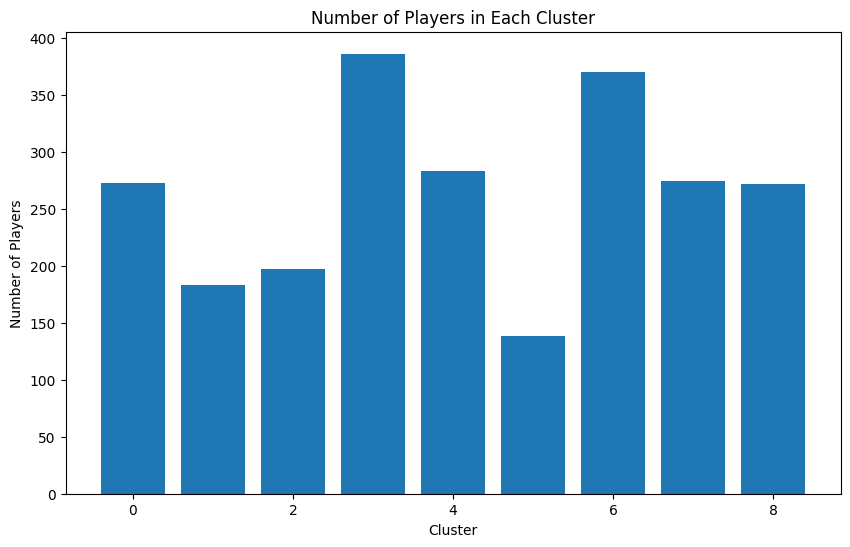

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
data = pd.read_csv('forPCA.csv')
data = data.drop(data.columns[0], axis=1)  # Drop the unnamed column
data = data.dropna()

# Select the specified features
selected_features = ['PTS', 'TRB', 'AST', 'STL', 'BLK', '2PA', '3P', '3PA', 'FT', 'poss', 'PER']
X = data[selected_features].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train SOM with 3x3 grid for 9 clusters
som_shape = (3, 3)  # Changed to 3x3 grid
som = MiniSom(som_shape[0], som_shape[1], X_scaled.shape[1], sigma=1.0, learning_rate=0.5, 
              neighborhood_function='gaussian', random_seed=42)

# Initialize weights
som.random_weights_init(X_scaled)

# Train the SOM
som.train(X_scaled, 10000, verbose=True)

# Get the winning neuron (BMU) for each data point
winners = np.array([som.winner(x) for x in X_scaled])

# Calculate U-Matrix (distance between neighboring neurons)
umatrix = som.distance_map()

# Visualize the U-Matrix
plt.figure(figsize=(10, 10))
plt.pcolor(umatrix.T, cmap='bone_r')
plt.colorbar()
plt.title('U-Matrix (3x3 Grid)')
plt.show()

# Create cluster labels
cluster_labels = np.ravel_multi_index(winners.T, som_shape)

# Add cluster labels to original data
data['Cluster'] = cluster_labels

# Calculate feature means for each cluster
cluster_means = data.groupby('Cluster')[selected_features].mean()

# Print summary of clusters
print("\nNumber of players in each cluster:")
print(data['Cluster'].value_counts())

# Visualize feature distributions across clusters
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='Cluster', y=feature, data=data)
    plt.xticks(rotation=45)
    plt.title(f'{feature} by Cluster')
plt.tight_layout()
plt.show()

# Create a heatmap of cluster centers
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, cmap='YlOrRd', annot=True, fmt='.2f')
plt.title('Cluster Centers Heatmap (9 Clusters)')
plt.show()

# Print characteristics of each cluster
print("\nCluster Characteristics:")
for cluster in sorted(data['Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    cluster_stats = data[data['Cluster'] == cluster][selected_features].mean()
    for feature, value in cluster_stats.items():
        print(f"{feature}: {value:.2f}")
    print(f"Number of players: {len(data[data['Cluster'] == cluster])}")

# Save results
results = data[['Cluster'] + selected_features]
results.to_csv('som_clustering_results_9clusters.csv', index=False)

# Additional visualization: Cluster sizes
plt.figure(figsize=(10, 6))
cluster_sizes = data['Cluster'].value_counts().sort_index()
plt.bar(range(9), cluster_sizes)
plt.title('Number of Players in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Players')
plt.show()

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from minisom import MiniSom
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load and prepare data
data = pd.read_csv('forPCA.csv')
data = data.drop(data.columns[0], axis=1)
data = data.dropna()

# Select features
selected_features = ['PTS', 'TRB', 'AST', 'STL', 'BLK', '2PA', '3P', '3PA', 'FT', 'poss', 'PER']
X = data[selected_features].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for 3D visualization
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

# Initialize and train SOM
som_shape = (3, 3)  # 9 clusters
som = MiniSom(som_shape[0], som_shape[1], X_scaled.shape[1],
              sigma=1.0, learning_rate=0.5,
              neighborhood_function='gaussian',
              random_seed=42)

som.random_weights_init(X_scaled)
som.train(X_scaled, 20000, verbose=True)

# Get SOM clusters
winners = np.array([som.winner(x) for x in X_scaled])
som_cluster_labels = np.ravel_multi_index(winners.T, som_shape)

# Apply K-means
kmeans = KMeans(n_clusters=9, random_state=42, n_init=10)
kmeans_cluster_labels = kmeans.fit_predict(X_scaled)

# Create DataFrame for plotting
plot_df = pd.DataFrame({
    'PC1': X_pca_3d[:, 0],
    'PC2': X_pca_3d[:, 1],
    'PC3': X_pca_3d[:, 2],
    'SOM_Cluster': som_cluster_labels,
    'KMeans_Cluster': kmeans_cluster_labels
})

# Calculate explained variance ratios
explained_var = pca.explained_variance_ratio_ * 100

# Create 3D subplots
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=('SOM Clusters', 'K-means Clusters')
)

# Add SOM clusters
fig.add_trace(
    go.Scatter3d(
        x=plot_df['PC1'],
        y=plot_df['PC2'],
        z=plot_df['PC3'],
        mode='markers',
        marker=dict(
            size=5,
            color=plot_df['SOM_Cluster'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(x=0.45, title='Cluster')
        ),
        text=[f'Cluster {c}' for c in plot_df['SOM_Cluster']],
        hovertemplate='<b>Cluster:</b> %{text}<br>' +
                      '<b>PC1:</b> %{x:.2f}<br>' +
                      '<b>PC2:</b> %{y:.2f}<br>' +
                      '<b>PC3:</b> %{z:.2f}<br>',
        name='SOM'
    ),
    row=1, col=1
)

# Add K-means clusters
fig.add_trace(
    go.Scatter3d(
        x=plot_df['PC1'],
        y=plot_df['PC2'],
        z=plot_df['PC3'],
        mode='markers',
        marker=dict(
            size=5,
            color=plot_df['KMeans_Cluster'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(x=1.0, title='Cluster')
        ),
        text=[f'Cluster {c}' for c in plot_df['KMeans_Cluster']],
        hovertemplate='<b>Cluster:</b> %{text}<br>' +
                      '<b>PC1:</b> %{x:.2f}<br>' +
                      '<b>PC2:</b> %{y:.2f}<br>' +
                      '<b>PC3:</b> %{z:.2f}<br>',
        name='K-means'
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title=dict(
        text='3D Visualization of Basketball Player Clusters<br>' +
             f'<sup>Explained variance - PC1: {explained_var[0]:.1f}%, ' +
             f'PC2: {explained_var[1]:.1f}%, PC3: {explained_var[2]:.1f}%</sup>',
        x=0.5,
        y=0.95
    ),
    width=1200,
    height=600,
    showlegend=False,
    scene=dict(
        xaxis_title=f"PC1 ({explained_var[0]:.1f}%)",
        yaxis_title=f"PC2 ({explained_var[1]:.1f}%)",
        zaxis_title=f"PC3 ({explained_var[2]:.1f}%)"
    ),
    scene2=dict(
        xaxis_title=f"PC1 ({explained_var[0]:.1f}%)",
        yaxis_title=f"PC2 ({explained_var[1]:.1f}%)",
        zaxis_title=f"PC3 ({explained_var[2]:.1f}%)"
    )
)

# Show plot
fig.show()

# Save cluster assignments and PCA coordinates
results = pd.DataFrame({
    'SOM_Cluster': som_cluster_labels,
    'KMeans_Cluster': kmeans_cluster_labels,
    'PC1': X_pca_3d[:, 0],
    'PC2': X_pca_3d[:, 1],
    'PC3': X_pca_3d[:, 2]
})

# Add original features
for i, feature in enumerate(selected_features):
    results[feature] = X_scaled[:, i]

results.to_csv('3d_clustering_results.csv', index=False)

# Print cluster analysis
print("\nCluster Size Analysis:")
print("\nSOM Clusters:")
print(results['SOM_Cluster'].value_counts().sort_index())
print("\nK-means Clusters:")
print(results['KMeans_Cluster'].value_counts().sort_index())

# Calculate cluster centers in original feature space
print("\nCluster Centers (Original Features):")
som_centers = pd.DataFrame(X_scaled, columns=selected_features).groupby(som_cluster_labels).mean()
kmeans_centers = pd.DataFrame(X_scaled, columns=selected_features).groupby(kmeans_cluster_labels).mean()

print("\nSOM Cluster Centers:")
print(som_centers)
print("\nK-means Cluster Centers:")
print(kmeans_centers)

 [ 20000 / 20000 ] 100% - 0:00:00 left 
 quantization error: 1.686667350860285



Cluster Size Analysis:

SOM Clusters:
0    477
1    162
2    175
3    286
4    257
5    164
6    230
7    348
8    277
Name: SOM_Cluster, dtype: int64

K-means Clusters:
0    235
1    248
2     80
3    113
4    121
5    589
6    248
7    418
8    324
Name: KMeans_Cluster, dtype: int64

Cluster Centers (Original Features):

SOM Cluster Centers:
        PTS       TRB       AST       STL       BLK       2PA        3P  \
0  0.437869  0.083117  0.170753  0.472630 -0.102752  0.100450  1.017833   
1  1.218770  2.384085  0.059881  0.524818  2.259534  1.849420 -0.795544   
2 -0.560228 -0.515283 -0.511638 -0.762512 -0.411356 -0.450755 -0.588652   
3  1.727132  0.530831  1.837892  1.490418  0.087031  1.457630  1.189824   
4 -0.154957  0.712342 -0.445473 -0.146090  0.869394  0.203082 -0.841635   
5 -0.918205 -0.362847 -0.714687 -0.717246 -0.087573 -0.683073 -0.916741   
6 -0.341422 -0.514076  0.421804  0.133053 -0.536697 -0.265759 -0.186430   
7 -0.671033 -0.642479 -0.571295 -0.615924 -0.475997 -

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load and prepare data
data = pd.read_csv('forPCA.csv')
data = data.drop(data.columns[0], axis=1)
data = data.dropna()

# Select features
selected_features = ['PTS', 'TRB', 'AST', 'STL', 'BLK', '2PA', '3P', '3PA', 'FT', 'poss', 'PER']
X = data[selected_features].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train SOM
som_shape = (3, 3)  # 9 clusters
som = MiniSom(som_shape[0], som_shape[1], X_scaled.shape[1],
              sigma=1.0, learning_rate=0.5,
              neighborhood_function='gaussian',
              random_seed=42)

som.random_weights_init(X_scaled)
som.train(X_scaled, 20000, verbose=True)

# Get SOM clusters
winners = np.array([som.winner(x) for x in X_scaled])
som_cluster_labels = np.ravel_multi_index(winners.T, som_shape)

# Apply K-means
kmeans = KMeans(n_clusters=9, random_state=42, n_init=10)
kmeans_cluster_labels = kmeans.fit_predict(X_scaled)

# Create DataFrame for plotting
plot_df = pd.DataFrame({
    'SOM_Cluster': som_cluster_labels,
    'KMeans_Cluster': kmeans_cluster_labels
})

for i, feature in enumerate(selected_features):
    plot_df[feature] = X_scaled[:, i]

# Create 3D subplots
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=('SOM Clusters', 'K-means Clusters')
)

# Add SOM clusters
fig.add_trace(
    go.Scatter3d(
        x=plot_df[selected_features[0]],
        y=plot_df[selected_features[1]],
        z=plot_df[selected_features[2]],
        mode='markers',
        marker=dict(
            size=5,
            color=plot_df['SOM_Cluster'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(x=0.45, title='SOM Cluster')
        ),
        # Removed text and hovertemplate to eliminate the hover functionality
        name='SOM Clusters'
    ),
    row=1, col=1
)

# Add K-means clusters
fig.add_trace(
    go.Scatter3d(
        x=plot_df[selected_features[0]],
        y=plot_df[selected_features[1]],
        z=plot_df[selected_features[2]],
        mode='markers',
        marker=dict(
            size=5,
            color=plot_df['KMeans_Cluster'],
            colorscale='Jet',  # Use a different colorscale for better distinction
            showscale=True,
            colorbar=dict(
                x=1.05,  # Move colorbar further right
                y=0.5,  # Center the colorbar vertically
                tickvals=[0, 1, 2, 3, 4, 5, 6, 7, 8],  # Set specific ticks
                ticktext=[f'Cluster {i}' for i in range(9)],  # Label each cluster
                title='KMeans Cluster'
            )
        ),
        # Removed text and hovertemplate to eliminate the hover functionality
        name='KMeans Clusters'
    ),
    row=1, col=2
)

# Update layout with better titles and legends
fig.update_layout(
    title=dict(
        text='3D Visualization of Basketball Player Clusters (SOM vs KMeans)',
        x=0.5,
        y=0.95
    ),
    width=1200,
    height=600,
    showlegend=True,  # Show legend to distinguish between SOM and KMeans
    scene=dict(
        xaxis_title=selected_features[0],
        yaxis_title=selected_features[1],
        zaxis_title=selected_features[2]
    ),
    scene2=dict(
        xaxis_title=selected_features[0],
        yaxis_title=selected_features[1],
        zaxis_title=selected_features[2]
    )
)

# Show plot
fig.show()



# Save cluster assignments and cluster centers
results = pd.DataFrame({
    'SOM_Cluster': som_cluster_labels,
    'KMeans_Cluster': kmeans_cluster_labels
})

for i, feature in enumerate(selected_features):
    results[feature] = X_scaled[:, i]

results.to_csv('3d_clustering_results.csv', index=False)

print("\nCluster Size Analysis:")
print("\nSOM Clusters:")
print(results['SOM_Cluster'].value_counts().sort_index())
print("\nK-means Clusters:")
print(results['KMeans_Cluster'].value_counts().sort_index())

print("\nCluster Centers (Original Features):")
som_centers = pd.DataFrame(X_scaled, columns=selected_features).groupby(som_cluster_labels).mean()
kmeans_centers = pd.DataFrame(X_scaled, columns=selected_features).groupby(kmeans_cluster_labels).mean()

print("\nSOM Cluster Centers:")
print(som_centers)
print("\nK-means Cluster Centers:")
print(kmeans_centers)

 [ 20000 / 20000 ] 100% - 0:00:00 left 
 quantization error: 1.686667350860285



Cluster Size Analysis:

SOM Clusters:
0    477
1    162
2    175
3    286
4    257
5    164
6    230
7    348
8    277
Name: SOM_Cluster, dtype: int64

K-means Clusters:
0    235
1    248
2     80
3    113
4    121
5    589
6    248
7    418
8    324
Name: KMeans_Cluster, dtype: int64

Cluster Centers (Original Features):

SOM Cluster Centers:
        PTS       TRB       AST       STL       BLK       2PA        3P  \
0  0.437869  0.083117  0.170753  0.472630 -0.102752  0.100450  1.017833   
1  1.218770  2.384085  0.059881  0.524818  2.259534  1.849420 -0.795544   
2 -0.560228 -0.515283 -0.511638 -0.762512 -0.411356 -0.450755 -0.588652   
3  1.727132  0.530831  1.837892  1.490418  0.087031  1.457630  1.189824   
4 -0.154957  0.712342 -0.445473 -0.146090  0.869394  0.203082 -0.841635   
5 -0.918205 -0.362847 -0.714687 -0.717246 -0.087573 -0.683073 -0.916741   
6 -0.341422 -0.514076  0.421804  0.133053 -0.536697 -0.265759 -0.186430   
7 -0.671033 -0.642479 -0.571295 -0.615924 -0.475997 -

In [3]:
import numpy as np
from minisom import MiniSom
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess the data
data = pd.read_csv('forPCA.csv')
data = data.drop(data.columns[0], axis=1)
data = data.dropna()
selected_features = ['PTS', 'TRB', 'AST', 'STL', 'BLK', '2PA', '3P', '3PA', 'FT', 'poss', 'PER']
X = data[selected_features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define SOM shape and parameters
som_shape = (3,3)  # Adjust as needed
som = MiniSom(som_shape[0], som_shape[1], X_scaled.shape[1], sigma=1.0, learning_rate=0.5,
              neighborhood_function='gaussian', random_seed=42)
som.random_weights_init(X_scaled)

# Initialize the bias term
# Each neuron has a bias term initialized to 0
bias_term = np.zeros(som_shape)

# Train SOM with bias adjustment
n_iterations = 20000
for iteration in range(n_iterations):
    # Randomly pick a sample from the data
    sample = X_scaled[np.random.randint(0, X_scaled.shape[0])]
    
    # Get the winner with bias adjustment (penalize neurons that won frequently)
    distances = np.array([[np.linalg.norm(sample - som.get_weights()[i, j]) + bias_term[i, j] 
                           for j in range(som_shape[1])] for i in range(som_shape[0])])
    winner = np.unravel_index(distances.argmin(), distances.shape)

    # Update the bias term to penalize the winning neuron
    bias_term[winner] += 0.01  # Increase the penalty for the winning neuron
    som.update(sample, winner, iteration, n_iterations)

# Step 2: Perform clustering on SOM centroids
centroids = []
for i in range(som_shape[0]):
    for j in range(som_shape[1]):
        centroids.append(som.get_weights()[i][j])
centroids = np.array(centroids)

# Final clustering with KMeans
final_kmeans = KMeans(n_clusters=9, random_state=42, n_init=10)
centroid_clusters = final_kmeans.fit_predict(centroids)
initial_winners = np.array([som.winner(x) for x in X_scaled])
initial_clusters = np.ravel_multi_index(np.array(initial_winners).T, som_shape)
final_clusters = np.array([centroid_clusters[i] for i in initial_clusters])

# Step 3: Evaluate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score

lda = LinearDiscriminantAnalysis()
lda.fit(X_scaled, final_clusters)
y_pred = lda.predict(X_scaled)

# Print Accuracy and F1 Score
accuracy = accuracy_score(final_clusters, y_pred)
f1 = f1_score(final_clusters, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8712
F1 Score: 0.8718


In [1]:
import numpy as np
from minisom import MiniSom
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score

# Load and preprocess the data
data = pd.read_csv('forPCA.csv')
data = data.drop(data.columns[0], axis=1)
data = data.dropna()
selected_features = ['PTS', 'TRB', 'AST', 'STL', 'BLK', '2PA', '3P', '3PA', 'FT', 'poss', 'PER']
X = data[selected_features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define SOM shape and parameters
som_shape = (3, 3)  # Adjust as needed
som = MiniSom(som_shape[0], som_shape[1], X_scaled.shape[1], sigma=1.0, learning_rate=0.5,
              neighborhood_function='gaussian', random_seed=42)
som.random_weights_init(X_scaled)

# Initialize the bias term
bias_term = np.zeros(som_shape)

# Train SOM with bias adjustment
n_iterations = 20000
for iteration in range(n_iterations):
    # Randomly pick a sample from the data
    sample = X_scaled[np.random.randint(0, X_scaled.shape[0])]
    
    # Get the winner with bias adjustment (penalize neurons that won frequently)
    distances = np.array([[np.linalg.norm(sample - som.get_weights()[i, j]) + bias_term[i, j] 
                           for j in range(som_shape[1])] for i in range(som_shape[0])])
    winner = np.unravel_index(distances.argmin(), distances.shape)

    # Update the bias term to penalize the winning neuron
    bias_term[winner] += 0.01  # Increase the penalty for the winning neuron
    som.update(sample, winner, iteration, n_iterations)

# Step 1: Cluster assignments for SOM clusters
initial_winners = np.array([som.winner(x) for x in X_scaled])
initial_clusters = np.ravel_multi_index(np.array(initial_winners).T, som_shape)  # SOM clusters

# Step 2: Perform clustering on SOM centroids using KMeans
centroids = np.array([som.get_weights()[i, j] for i in range(som_shape[0]) for j in range(som_shape[1])])
final_kmeans = KMeans(n_clusters=9, random_state=42, n_init=10)
centroid_clusters = final_kmeans.fit_predict(centroids)  # Cluster labels for centroids
final_clusters = np.array([centroid_clusters[i] for i in initial_clusters])  # SOM -> KMeans clusters for each sample

# Step 3: Evaluate SOM and KMeans clusters using LDA and F1/Accuracy metrics
# LDA to predict on SOM clusters
lda_som = LinearDiscriminantAnalysis()
lda_som.fit(X_scaled, initial_clusters)
som_pred = lda_som.predict(X_scaled)
som_accuracy = accuracy_score(initial_clusters, som_pred)
som_f1 = f1_score(initial_clusters, som_pred, average='weighted')

# LDA to predict on KMeans clusters
lda_kmeans = LinearDiscriminantAnalysis()
lda_kmeans.fit(X_scaled, final_clusters)
kmeans_pred = lda_kmeans.predict(X_scaled)
kmeans_accuracy = accuracy_score(final_clusters, kmeans_pred)
kmeans_f1 = f1_score(final_clusters, kmeans_pred, average='weighted')

# Print both F1 Score and Accuracy for SOM and KMeans clusters
print(f"SOM Clustering - Accuracy: {som_accuracy:.4f}, F1 Score: {som_f1:.4f}")
print(f"KMeans Clustering - Accuracy: {kmeans_accuracy:.4f}, F1 Score: {kmeans_f1:.4f}")


SOM Clustering - Accuracy: 0.8653, F1 Score: 0.8652
KMeans Clustering - Accuracy: 0.8653, F1 Score: 0.8652


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from minisom import MiniSom
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess the data
data = pd.read_csv('forPCA.csv')
data = data.drop(data.columns[0], axis=1)
data = data.dropna()
selected_features = ['PTS', 'TRB', 'AST', 'STL', 'BLK', '2PA', '3P', '3PA', 'FT', 'poss', 'PER']
X = data[selected_features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define SOM shape and parameters
som_shape = (3, 3)  # Adjust as needed
som = MiniSom(som_shape[0], som_shape[1], X_scaled.shape[1], sigma=1.0, learning_rate=0.5,
              neighborhood_function='gaussian', random_seed=42)
som.random_weights_init(X_scaled)

# Initialize the bias term
bias_term = np.zeros(som_shape)

# Train SOM with bias adjustment
n_iterations = 20000
for iteration in range(n_iterations):
    # Randomly pick a sample from the data
    sample = X_scaled[np.random.randint(0, X_scaled.shape[0])]
    
    # Get the winner with bias adjustment (penalize neurons that won frequently)
    distances = np.array([[np.linalg.norm(sample - som.get_weights()[i, j]) + bias_term[i, j] 
                           for j in range(som_shape[1])] for i in range(som_shape[0])])
    winner = np.unravel_index(distances.argmin(), distances.shape)

    # Update the bias term to penalize the winning neuron
    bias_term[winner] += 0.01  # Increase the penalty for the winning neuron
    som.update(sample, winner, iteration, n_iterations)

# Step 1: Cluster assignments for SOM clusters
initial_winners = np.array([som.winner(x) for x in X_scaled])
initial_clusters = np.ravel_multi_index(np.array(initial_winners).T, som_shape)  # SOM clusters

# Step 2: Perform clustering on SOM centroids using KMeans
centroids = np.array([som.get_weights()[i, j] for i in range(som_shape[0]) for j in range(som_shape[1])])
final_kmeans = KMeans(n_clusters=9, random_state=42, n_init=10)
centroid_clusters = final_kmeans.fit_predict(centroids)  # Cluster labels for centroids
final_clusters = np.array([centroid_clusters[i] for i in initial_clusters])  # SOM -> KMeans clusters for each sample

# Assuming you have true labels for the data (e.g., 'label' is the actual class label column)
# If you don't have these, you can't directly compute ROC curves.
true_labels = data['label'].values  # Adjust based on your actual ground truth labels column

# Binarize the true labels for ROC curve calculation (if you have multi-class)
true_labels_binarized = label_binarize(true_labels, classes=np.unique(true_labels))

# Compute ROC curve and AUC for SOM clusters
fpr_som, tpr_som, _ = roc_curve(true_labels_binarized.ravel(), initial_clusters)
roc_auc_som = auc(fpr_som, tpr_som)

# Compute ROC curve and AUC for KMeans clusters
fpr_kmeans, tpr_kmeans, _ = roc_curve(true_labels_binarized.ravel(), final_clusters)
roc_auc_kmeans = auc(fpr_kmeans, tpr_kmeans)

# Plot ROC curves for both SOM and KMeans
plt.figure(figsize=(10, 6))
plt.plot(fpr_som, tpr_som, color='b', lw=2, label=f'SOM (AUC = {roc_auc_som:.2f})')
plt.plot(fpr_kmeans, tpr_kmeans, color='r', lw=2, label=f'KMeans (AUC = {roc_auc_kmeans:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for SOM and KMeans Clustering')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


KeyError: 'label'